<a href="https://colab.research.google.com/github/Ullimafathonah/Pemrogramanpython/blob/main/Tugas11%20Ullima%20Fathonah%20Remelko%201101208445.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [54]:
ls

 3scene/                          dataset/        'Tugaspython ullima.ipynb'
 best_weight_scene_mobileNet.h5   nnmodel_scene/   Untitled0.ipynb


In [55]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [56]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [57]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((32, 32))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [58]:
print(labels)

['GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03',

In [59]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [60]:
print(labels)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [61]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 32, 32, 3)
(146, 32, 32, 3)


In [81]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(32,32,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               57700     
_________________________________________________________________
dense_15 (Dense)             (None, 5)               

In [82]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [83]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=38, batch_size=42)

Epoch 1/38
11/11 [==============================] - 0s 36ms/step - loss: 1.5885 - accuracy: 0.2694 - val_loss: 1.5740 - val_accuracy: 0.2055
Epoch 2/38
11/11 [==============================] - 0s 23ms/step - loss: 1.5145 - accuracy: 0.3539 - val_loss: 1.5194 - val_accuracy: 0.3356
Epoch 3/38
11/11 [==============================] - 0s 24ms/step - loss: 1.4196 - accuracy: 0.4361 - val_loss: 1.4425 - val_accuracy: 0.3493
Epoch 4/38
11/11 [==============================] - 0s 23ms/step - loss: 1.3090 - accuracy: 0.4886 - val_loss: 1.3601 - val_accuracy: 0.4658
Epoch 5/38
11/11 [==============================] - 0s 24ms/step - loss: 1.2566 - accuracy: 0.5023 - val_loss: 1.2620 - val_accuracy: 0.4589
Epoch 6/38
11/11 [==============================] - 0s 25ms/step - loss: 1.1663 - accuracy: 0.5205 - val_loss: 1.2371 - val_accuracy: 0.4384
Epoch 7/38
11/11 [==============================] - 0s 24ms/step - loss: 1.0800 - accuracy: 0.5594 - val_loss: 1.1766 - val_accuracy: 0.5548
Epoch 8/38
11

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


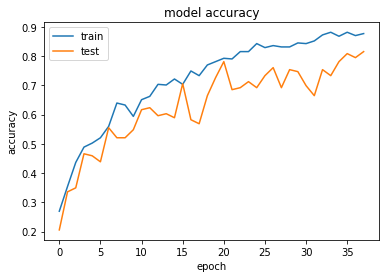

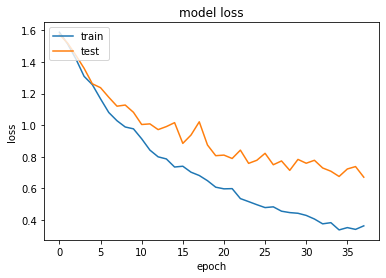

In [84]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [85]:
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=42)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.81      0.70      0.75        30
      GMB_02       0.83      0.85      0.84        34
      GMB_03       0.79      1.00      0.89        27
      GMB_04       0.77      0.67      0.71        30
      GMB_05       0.88      0.88      0.88        25

    accuracy                           0.82       146
   macro avg       0.82      0.82      0.81       146
weighted avg       0.81      0.82      0.81       146

